# Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this [lesson](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions) on Khan Academy.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv')
df.rename(columns={'#':'id'},inplace=True)
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Text(0.5,0,'Log Value')

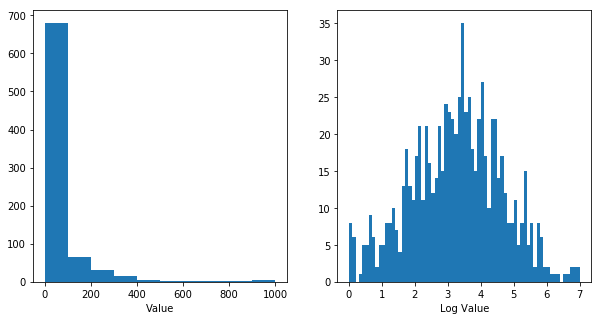

In [14]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
bin_edges=np.arange(0,df.weight.max()+100,100);
plt.hist(data=df,x=df.weight , bins=bin_edges);
plt.xlabel('Value')

plt.subplot(1,2,2)
log_data=np.log(df.weight)
bin_edges=np.arange(0,log_data.max()+.1,.1);
plt.hist(log_data , bins=bin_edges);
plt.xlabel('Log Value')


In the plot on the left, the few data points with value above 1000 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the 'log' scale here.

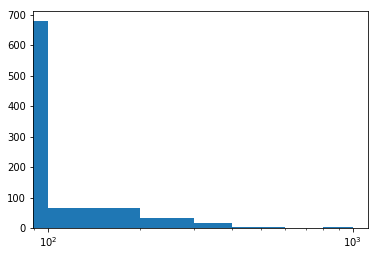

In [8]:
bin_edges = np.arange(0, df.weight.max()+100, 100)
plt.hist(df.weight, bins = bin_edges)
plt.xscale('log')

In [13]:
260/1000

0.26